### Ben Goodwin
### NLP Homework #6

1.	Evaluate text similarity of Amazon book search results by doing the following:

a.	Do a book search on Amazon via the search box. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results. 

b.	In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one. 

c.	Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?


In [1]:
#Bring in the libraries
import pandas as pd
import numpy as np 
import nltk as nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Add in top 24 books on amazon tagged "statistics"
corpus = ["Making sense of medical statistics a bite sized visual guide", 
         "Introduction to statistics: an intuitive guide for analzying data and unlocking discoveries", 
          "Introduction to probability statistics and random processes", 
           "statistics for college students and researchers: second edition", 
           "Statistics, 11th edition",
         "Statistics, 4th edition",
          "Statistics for people who (think they) hate statistics",
         "elementary statistics",
         "introductory statistics",
          "introduction to probability and statistics",
          "AP Statistics Premium: With 9 Practice Tests (Barron's Test Prep)",
         "Naked statistics: Stripping the dread from the data",
          "Elementary Statistics: A Brief Version",
          "Medical Statistics: A Textbook for the Health Sciences",
          "Statistics for Absolute Beginners (Second Edition)",
          "Introduction to Modern Statistics",
          "Fundamnetals of Statistics",
          "Principals of Statistics (Dover Books on Mathematics)",
          "Causal Inference for Statistics, Social, and Biomedical Sciences AN Introduction",
         "An Introduction to Statistical Learning",
          "The Practice of Statistics Sixth Edition",
          "The Practice of Statistics: Fifth Edition",
          "Statistics for Dummies",
          "Applied Statistics I Basic Bivariate Techniques",
          "Statistics Textbook"]  

In [3]:
#Define TfidfVecotrizer and include english stop words
vect = TfidfVectorizer(min_df=1, stop_words="english")
#Call Tfidf funtion on our corpus of "statistics" books
tfidf = vect.fit_transform(corpus)
#Finally, compute pairwise similarity 
pairwise_similarity = tfidf * tfidf.T

In [4]:
#Convert the pairwise similarity to array
pairwise_similarity.toarray()

array([[1.        , 0.13686949, 0.01815659, 0.01590086, 0.02684379,
        0.02684379, 0.03604688, 0.03530495, 0.0316224 , 0.02898838,
        0.01269321, 0.01674268, 0.01944155, 0.18187394, 0.01815659,
        0.02684379, 0.0316224 , 0.0162971 , 0.01431964, 0.        ,
        0.02244005, 0.02244005, 0.0316224 , 0.0162971 , 0.03530495],
       [0.13686949, 1.        , 0.11306966, 0.01664159, 0.02809429,
        0.02809429, 0.0377261 , 0.0369496 , 0.0330955 , 0.18052435,
        0.01328452, 0.17948574, 0.02034723, 0.01858292, 0.0190024 ,
        0.16716902, 0.0330955 , 0.01705629, 0.08917516, 0.10968369,
        0.0234854 , 0.0234854 , 0.0330955 , 0.01705629, 0.0369496 ],
       [0.01815659, 0.11306966, 1.        , 0.02261273, 0.03817476,
        0.03817476, 0.05126254, 0.05020743, 0.04497044, 0.62634022,
        0.01805111, 0.0238099 , 0.02764798, 0.02525063, 0.02582062,
        0.22715065, 0.04497044, 0.02317623, 0.12117194, 0.14903911,
        0.03191216, 0.03191216, 0.04497044, 0.

In [17]:
arr = pairwise_similarity.toarray()     
np.fill_diagonal(arr, -1)

maxElement = np.amax(arr)
print(maxElement)
result = np.where(arr == np.amax(arr))
print(result)

0.6263402233549838
(array([2, 9]), array([9, 2]))


Based on the results above we can see that the two books that are the most similar have a cosine distance of 0.626340 and include the books:

"Introduction to probability statistics and random processes"
"introduction to probability and statistics"

This makes sense given the obvious similarity the titles have to each other. Among the first 24 results we the two most similar on this list are listings number 2  and number 9.


In [20]:
arr = pairwise_similarity.toarray()     
np.fill_diagonal(arr, 2)

minElement = np.amin(arr)
print(minElement)
result = np.where(arr == np.amin(arr))
print(result)

0.0
(array([ 0,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20,
       21, 22, 23, 24]), array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  0,  3,  4,
        5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23, 24, 19,
       19, 19, 19, 19]))


These results are a bit different, we can see that we have many titles that reflect a score of zero in the cosine distance, indicating that these titles are all quite different.
However the most different title from the others: 
"Causal Inference for Statistics, Social, and Biomedical Sciences AN Introduction"

Among the first 24 we can see that this title stands out in both length and unique use of words.

2.	Now evaluate using a major search engine.

a.	Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 

b.	Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 

c.	Which one has the highest similarity measure? 


We will use the first entry: "Making sense of medical statistics a bite sized visual guide"

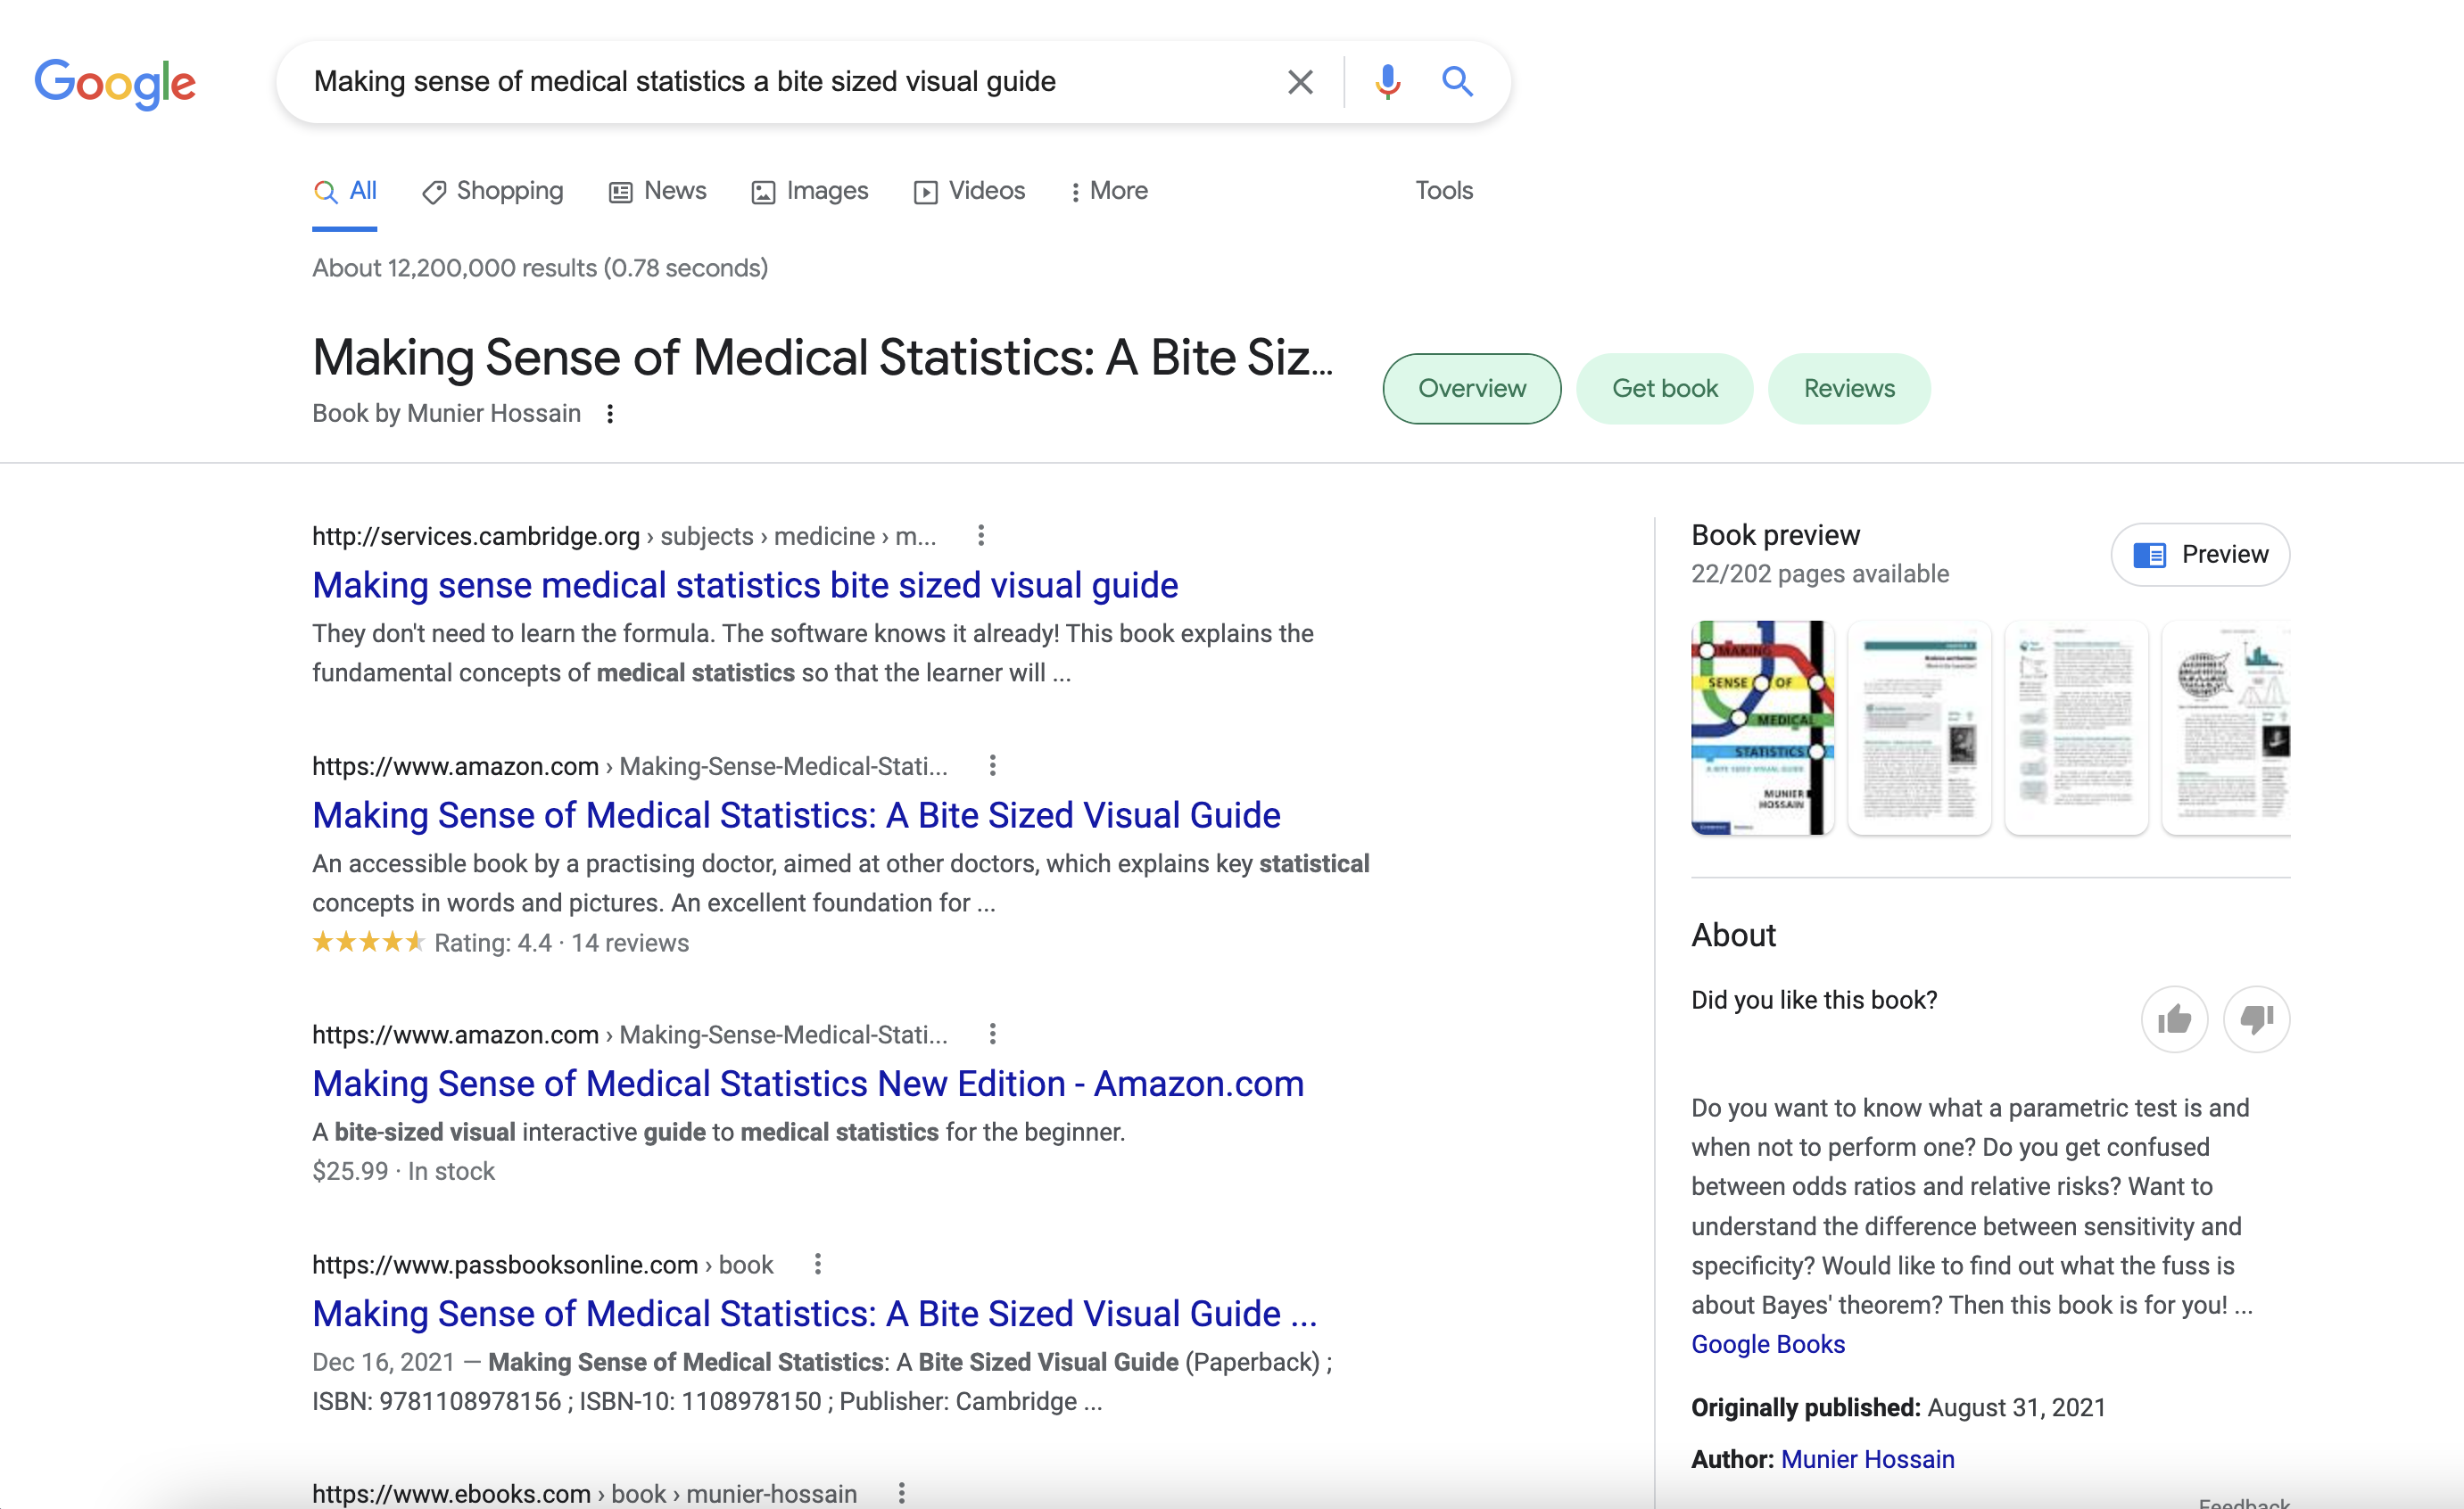

Here is the first organic result:
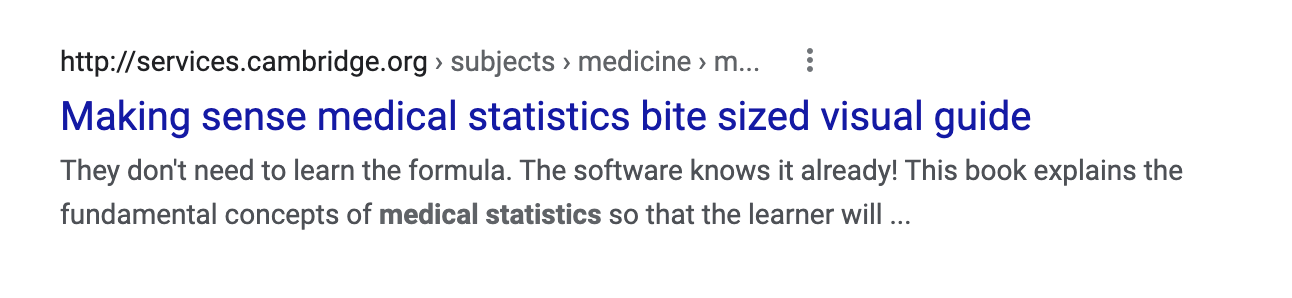

And the 20th result:
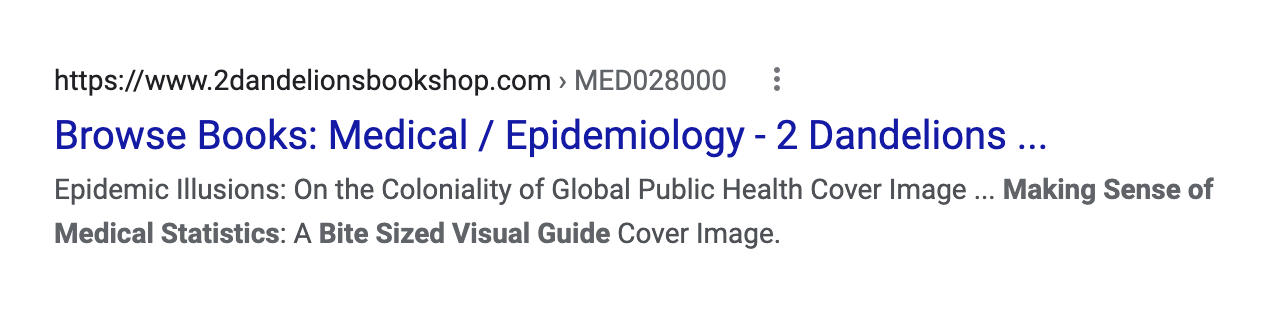